In [ ]:
from keras.datasets import cifar100
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


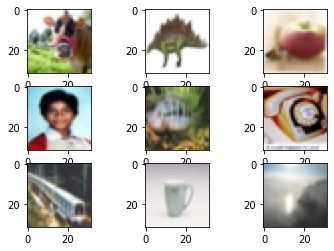

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X_train[i])
plt.show()


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout, Flatten
#tạo lớp ẩn
model = Sequential()
model.add(Flatten())
model.add(Dense(32,activation='relu',input_shape=(32,32,3)))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation="softmax"))
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
history=model.fit(X_train, y_train, batch_size=128, epochs = 200, verbose=1, validation_data=(X_test,y_test))

Epoch 1/200
391/391 [==============================] - 6s 6ms/step - loss: 4.3683 - accuracy: 0.0328 - val_loss: 4.1777 - val_accuracy: 0.0524
Epoch 2/200
391/391 [==============================] - 2s 5ms/step - loss: 4.1111 - accuracy: 0.0627 - val_loss: 4.1583 - val_accuracy: 0.0614
Epoch 3/200
391/391 [==============================] - 2s 5ms/step - loss: 4.0291 - accuracy: 0.0729 - val_loss: 3.9750 - val_accuracy: 0.0836
Epoch 4/200
391/391 [==============================] - 2s 5ms/step - loss: 3.9878 - accuracy: 0.0778 - val_loss: 3.9901 - val_accuracy: 0.0797
Epoch 5/200
391/391 [==============================] - 2s 5ms/step - loss: 3.9358 - accuracy: 0.0861 - val_loss: 3.8930 - val_accuracy: 0.0968
Epoch 6/200
391/391 [==============================] - 2s 5ms/step - loss: 3.8690 - accuracy: 0.0969 - val_loss: 3.8213 - val_accuracy: 0.1061
Epoch 7/200
391/391 [==============================] - 2s 5ms/step - loss: 3.8282 - accuracy: 0.1023 - val_loss: 3.9065 - val_accuracy: 0.0928

In [ ]:
model.save('cifar100_ANN.h5') #luu du lieu

In [ ]:
#goi thu vien load_model
from keras.models import load_model 
model6=load_model('cifar100_CNN.h5') #goi data

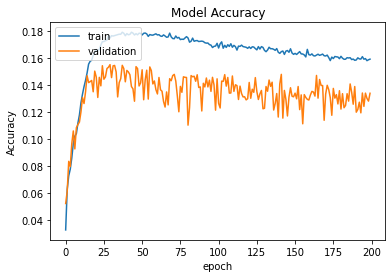

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

array([89])

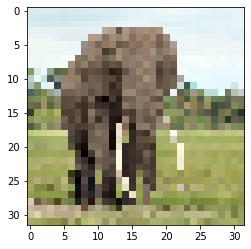

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img=load_img('1.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img), axis=1)